# Polynomial Regression and KNN

This notebook uses two dummy datasets to implement some basic concepts like a polynomial regression of order 2, and a knn model.

The first dataset (dataset1.csv) contains two input numeric columns X1 and X2, and one numeric output variable Y. We will use this one to apply the quadratic regression.

For the knn model, we will use the second dataset (dataset2.csv), that contains two numeric input variables X1 and X2 and one categorical output variable *category*.

# Polynomial Regression

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set plot dpi to get a larger image
plt.rcParams['figure.dpi'] = 150

In [18]:
# Read data from csv
df = pd.read_csv('dataset1.csv')

Importing the data of the first file to a dataframe, we can check that the that we have is two input numeric input variables (X1 and X2) and one numeric output variable (Y).

In [47]:
# Columns types
df.dtypes

X1     float64
X2     float64
Y      float64
X22    float64
dtype: object

In [19]:
# Display first 10 rows
df.head(10)

,X1,X2,Y
0,10.294924,4.748808,0.448642
1,11.466981,23.063941,0.622515
2,8.745475,92.809303,0.001725
3,10.329279,-18.178491,0.146117
4,16.715403,43.838181,0.201825
5,6.035598,93.948313,0.039300
6,20.467289,-45.867588,0.205348
7,19.176697,-5.426366,0.319930
8,7.322779,10.194489,0.417330
9,12.999714,-67.052049,-0.093827


We can check if the dataframe has some null or invalid value (will be a NaN value since all columns have float 64 type). As we can see, there is no row with a null or invalid value in our dataframe.

In [53]:
# Getting count of null values
df.isna().sum()

X1     0
X2     0
Y      0
X22    0
dtype: int64

Now we plot Y against X1 and X2, to see if we can observe by inspection some correlation between the variables.

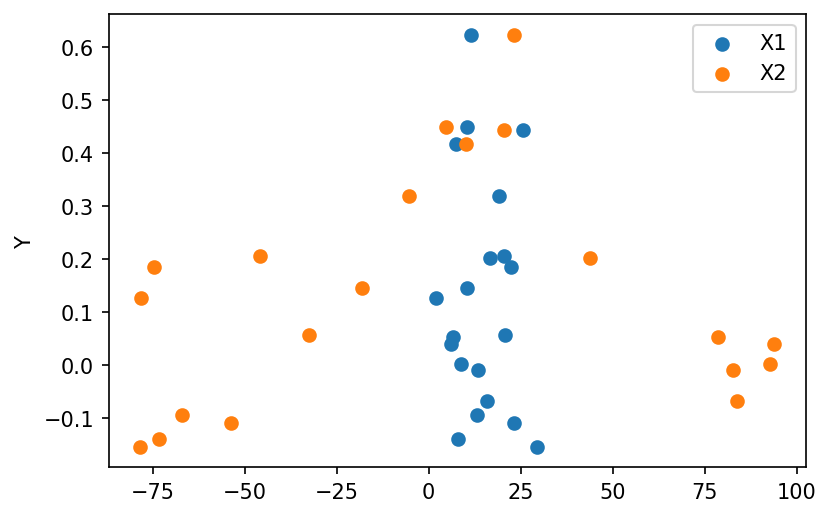

In [35]:
# Make scatter plot of Y against X1 and X2
plt.scatter(df["X1"],df["Y"], label='X1')
plt.scatter(df["X2"],df["Y"], label='X2')
plt.legend()
plt.ylabel('Y')
plt.show()

In the plot above, we can see that neither X1 or X2 seem to have a linear correlation with Y, X1 in particular do not seem to have any correlation at all with Y. However, it seems that X2 might have a quadratic correlation with Y, since it looks like we can model X2 as a parabola with negative concavity.

To test if these hypothesis make sense, let's look at some numeric indicators of the data, such as mean, standard deviation, max and min values, percentiles and especially the pearson coeficient, which will give us a quantization of the colinearity between the variables.

In [36]:
# Get useful statistics about data set
df.describe()

,X1,X2,Y,X22
count,20.000000,20.000000,20.000000,20.000000
mean,14.518566,0.357015,0.134921,3731.638394
std,7.442088,62.673011,0.221084,3093.619700
min,1.912730,-78.407612,-0.153620,22.551176
25%,8.547297,-56.965727,-0.023176,504.679042
50%,13.152291,-0.338779,0.091799,3684.662679
75%,20.547074,52.568554,0.233993,6161.586827
max,29.307859,93.948313,0.622515,8826.285540


In [37]:
# Calculate Pearson correlation coeficient
df.corr(method='pearson')

,X1,X2,Y,X22
X1,1.000000,-0.322402,-0.068110,-0.248363
X2,-0.322402,1.000000,0.130420,0.268260
Y,-0.068110,0.130420,1.000000,-0.693569
X22,-0.248363,0.268260,-0.693569,1.000000


We can see that in fact, neither of the variables seem to have a linear correlation with each other (absolute value of the coeficient not close to 1). In particular, since the pearson coeficient between X1 and Y is very close to zero, the two variables do not seem to have any correlation at all, as we expected by inspecting the plot of the variables. 

However, to test if we can model Y as a quadratic function of X2, we can square X2 and see if these values will generate a correlation coeficient that indicates a linear correlation.

In [38]:
# X22 equals X2^2
df['X22'] = df['X2']**2

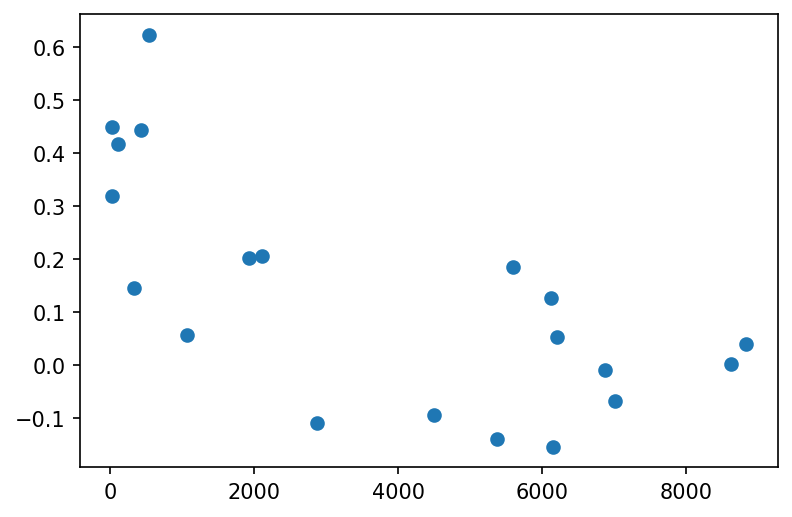

In [39]:
# Plotting Y against X22
plt.scatter(df["X22"],df["Y"], label='X2')

In [40]:
# Recalculating correlation
df.corr()

,X1,X2,Y,X22
X1,1.000000,-0.322402,-0.068110,-0.248363
X2,-0.322402,1.000000,0.130420,0.268260
Y,-0.068110,0.130420,1.000000,-0.693569
X22,-0.248363,0.268260,-0.693569,1.000000


We can see for the correlation matrix that in fact it's reasonable to estimate Y as a quadratic functions of X2. To make the model, we will make a polynomial fit using numpy.

In [41]:
# Get least square polynomial fit
fit2 = np.polyfit(df['X2'], df['Y'], 2)

# Calculating values of the polynomial fit for X2 values
fitted2 = np.polyval(fit2, df['X2'])

# Creating dataframe with the X2 and the evaluated values
df_fit2 = pd.DataFrame(data={'X':df['X2'], 'Y':fitted2}).sort_values('X')

In [43]:
# Display polynomial fit coeficients
fit2

array([-5.61032796e-05,  1.20296717e-03,  3.43848822e-01])

Writing the function using the coeficients calculated by the fit above we get:

$Y \approx -5.61 \cdot 10^{-5} X2^2 + 1.20 \cdot 10^{-3} X2 + 3.44 \cdot 10^{-1}$

(Note that X1 does not appear in the expression above, since the variable was discarted in this model for not having a significant correlation with Y).

Plotting the graph for the calculated polynomial, we can see that it looks reasonable to model our data.

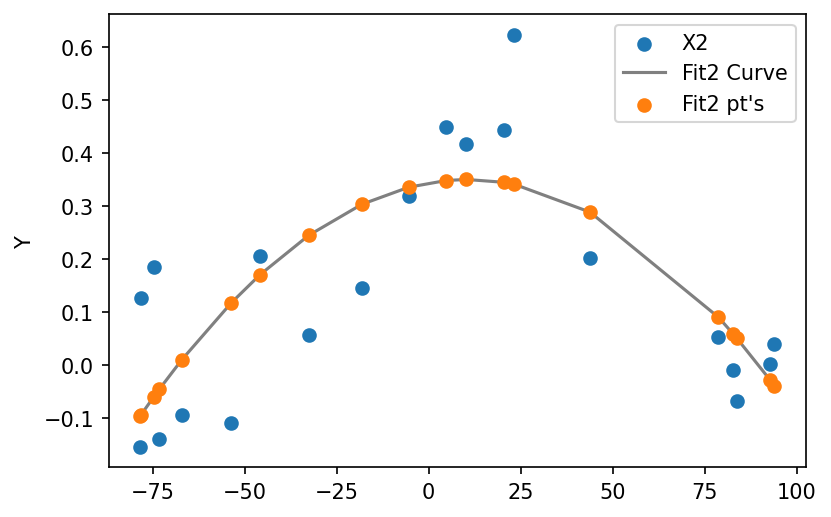

In [44]:
# Scatter plot of X2
plt.scatter(df["X2"],df["Y"], label='X2')

# Line plot of fitted values
plt.plot(df_fit2['X'], df_fit2['Y'], label='Fit2 Curve',color='gray',zorder=-1)

# Scatter plot of fitted values
plt.scatter(df["X2"], fitted2, label="Fit2 pt's")

# Legend
plt.legend()
plt.ylabel('Y')

plt.show()

# KNN

In [115]:
# Reading data from file
df = pd.read_csv('dataset2.csv')

In [116]:
# Renaming 
df = df.rename(columns={' Categoria ':'category', ' X2':'X2'})

In [117]:
df.columns

Index(['X1', 'X2', 'category'], dtype='object')

In [118]:
df.head(10)

,X1,X2,category
0,25.032328,99.419902,A
1,29.657765,-80.850355,B
2,22.446764,-3.111067,A
3,1.299994,99.691598,B
4,7.603403,26.899483,A
5,29.822193,53.061663,A
6,5.722317,-70.257208,A
7,27.651264,61.462682,A
8,26.547300,-45.981975,B
9,17.974244,65.835979,B


In the dataframe above, we can see two numeric input variables (X1 and X2) and one categorical output variable (category). We will add a color column (red for category A and blue for B), and then plot the points with the respective color to see what we get.

In [119]:
# Creating function to get color based on category
get_color = lambda column_category: column_category.apply(lambda x: 'red' if x=='A' else 'blue')

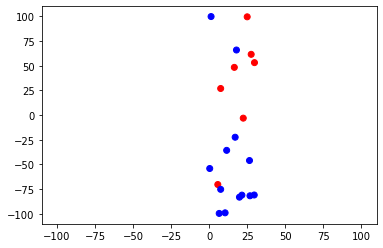

In [120]:
plt.scatter(df["X1"],df["X2"], color=get_color(df['category']))
plt.xlim(-110,110)
plt.ylim(-110,110)
plt.show()

Being categorical variables, we can model the data with the K Nearest Neighbours (KNN) method. We created the class below to facilitate the implementation of the knn method.

In [121]:
class KNN:
    
    def __init__(self, df: pd.DataFrame, output_var: str) -> None:
        '''
        df is the dataframe and output_var the output categorical variable
        '''
        self.df = df
        self.Y = df[output_var]
        self.X = df.drop(output_var, axis=1)
    
    
    def _get_dist(self, row1: pd.Series, row2: pd.Series) -> np.float64:
        '''
        Calculate the distance of the 2 points given by the rows passed as parameters
        '''
        
        # Coordinate squared distances
        square_dists = [(row1[x] - row2[x])**2 for x in self.X]
        
        # Getting total distance of the points
        distance = np.sqrt(sum(square_dists))
        
        return distance
    
    def _get_row_knn_cat(self, idx: int, k: int) -> str:
        '''
        Returns category of the knn for the row with index idx
        '''
        
        # Getting pd series with the distance from the other points
        df_without_idx_row = self.df.drop(idx)
        
        # Getting distances from point given by idx
        dists = df_without_idx_row.apply(lambda row: self._get_dist(self.df.loc[idx], row), axis=1)
        
        # Sorting the dists (ascending)
        df_without_idx_row['distance'] = dists
        df_without_idx_row = df_without_idx_row.sort_values('distance')
        
        # Select category by most frequent class in k nearest neighbors
        predicted_category = df_without_idx_row.head(k)['category'].value_counts().index[0]
        
        return predicted_category
    
    def get_knns(self, k: int = 10) -> None:
        '''
        Calculate the distances between the points to every row in the df
        and select the minimal distance as the knn, attributing it's category
        to the predicted value of the row.
        '''
        
        # Get predicted category for every row
        knns_cat = self.df.apply(
            lambda row: self._get_row_knn_cat(row.name, k),
            axis=1
        )
        self.df['predicted_cat'] = knns_cat
        
        # Get predicted_color for every row
        self.df['predicted_color'] = self.df['predicted_cat'].apply(lambda x: 'red' if x=='A' else 'blue')
        
    def plot(self) -> None:
        '''
        Plot the graph of calculated df
        '''
        plt.scatter(self.df["X1"],self.df["X2"], color=self.df['predicted_color'])
        plt.xlim(-110,110)
        plt.ylim(-110,110)
        plt.show()
        
    def number_of_errors(self) -> int:
        '''
        Return number of errors for the calculated df
        '''
        erros = self.df['predicted_cat'] != self.df['category']
        return sum(erros)

In [122]:
knn = KNN(df, 'category')

K: 1


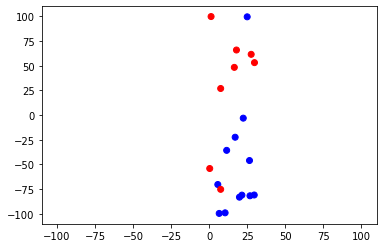

Errors: 7



K: 3


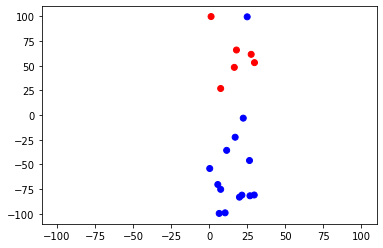

Errors: 5



K: 5


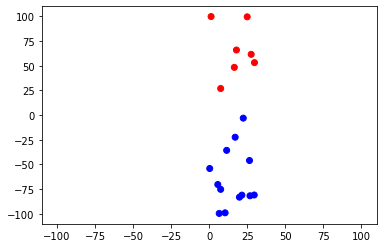

Errors: 4



K: 7


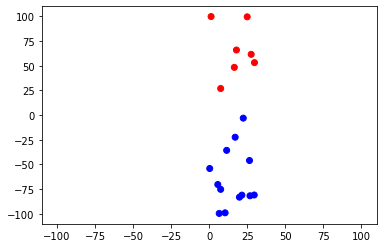

Errors: 4



K: 10


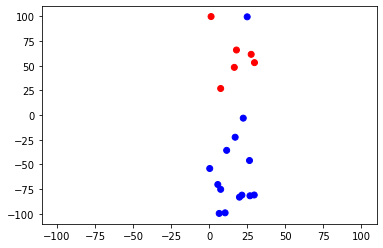

Errors: 5





In [123]:
# Getting the plot and number of errors for different k's
for k in [1,3,5,7,10]:
    print(f'K: {k}')
    knn.get_knns(k)
    knn.plot()
    print(f'Errors: {knn.number_of_errors()}\n\n\n')

As we can see in the comparison above, using different k's yields different results, and we can take the number os errors as a parameter to select the best k. Since the lowest number of errors was for k=5 and k=7, we can select both of them, but we will pick k=5 for being the lowest of the two and reducing the number of interactions needed for computing the nearest neighbours.